<a href="https://colab.research.google.com/github/riddhi-jain/Stroke-Prediction-Application/blob/main/Untitled8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Acquisition

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
data = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data Analysis

In [3]:
data.shape

(5110, 12)

In [4]:
data.info

<bound method DataFrame.info of          id  gender   age  ...   bmi   smoking_status stroke
0      9046    Male  67.0  ...  36.6  formerly smoked      1
1     51676  Female  61.0  ...   NaN     never smoked      1
2     31112    Male  80.0  ...  32.5     never smoked      1
3     60182  Female  49.0  ...  34.4           smokes      1
4      1665  Female  79.0  ...  24.0     never smoked      1
...     ...     ...   ...  ...   ...              ...    ...
5105  18234  Female  80.0  ...   NaN     never smoked      0
5106  44873  Female  81.0  ...  40.0     never smoked      0
5107  19723  Female  35.0  ...  30.6     never smoked      0
5108  37544    Male  51.0  ...  25.6  formerly smoked      0
5109  44679  Female  44.0  ...  26.2          Unknown      0

[5110 rows x 12 columns]>

In [36]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Only 'bmi' column holds some missing values. Hence, exploring the column more for insights.

In [6]:
data['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.7    37
26.1    37
        ..
13.9     1
49.9     1
40.6     1
52.3     1
44.1     1
Name: bmi, Length: 418, dtype: int64

In [7]:
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

# Data Preprocessing

## Handling missing data

In [37]:
# filling null values in 'bmi' column in data

data['bmi'].fillna(data['bmi'].mean(), inplace = True)

## Feature Selection

In [52]:
# dropping unnecessary columns

data.drop('id', axis = 1, inplace = True)
data.drop('ever_married', axis = 1, inplace = True)

In [11]:
data.shape

(5110, 11)

## Handling outliers

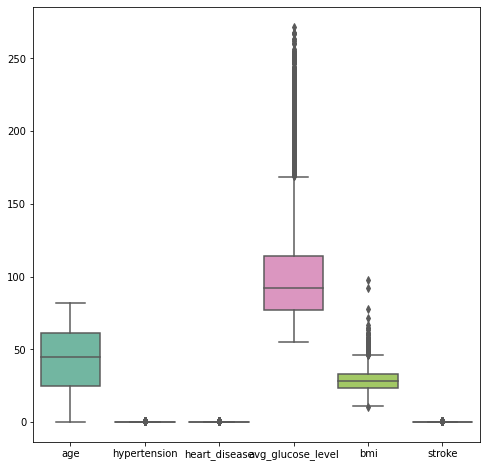

In [21]:
# checking for outliers 

fig, ax = plt.subplots(figsize = (8, 8))
sns.boxplot(data = data, palette = 'Set2')
plt.show();

In [27]:
print(data['avg_glucose_level'].describe())
print(" ")
print('Count of outliers in avg_glucose_level = ', data[data['avg_glucose_level'] > 114].shape[0] )

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64
 
Count of outliers in avg_glucose_level =  1282


In [41]:
data['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [46]:
quan = data['avg_glucose_level'].quantile(0.78)
quan2 = data['bmi'].quantile(0.98)
print("Quantile limit for avg_glucose_level = ", quan)
print("Quantile limit for bmi = ", quan2)

Quantile limit for avg_glucose_level =  119.672
Quantile limit for bmi =  48.08199999999997


In [54]:
# removing outliers 

filtered_data = data[data['avg_glucose_level'] < quan]
filtered_data = filtered_data[filtered_data['bmi'] < quan2]
filtered_data.shape


(3915, 10)

In [40]:
data.shape

(5110, 11)

## Encoding

In [56]:
# performing encoding (label encoding)

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

gender = encoder.fit_transform( filtered_data['gender'] )
smoking_status = encoder.fit_transform( filtered_data['smoking_status'] )
work_type = encoder.fit_transform( filtered_data['work_type'] )
Residence_type = encoder.fit_transform( filtered_data['Residence_type'] )

In [58]:
filtered_data['work_type'] = work_type
filtered_data['Residence_type'] = Residence_type
filtered_data['smoking_status'] = smoking_status
filtered_data['gender'] = gender
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3915 entries, 2 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3915 non-null   int64  
 1   age                3915 non-null   float64
 2   hypertension       3915 non-null   int64  
 3   heart_disease      3915 non-null   int64  
 4   work_type          3915 non-null   int64  
 5   Residence_type     3915 non-null   int64  
 6   avg_glucose_level  3915 non-null   float64
 7   bmi                3915 non-null   float64
 8   smoking_status     3915 non-null   int64  
 9   stroke             3915 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 336.4 KB


In [90]:
filtered_data.head()

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,1,80.0,0,1,2,0,105.92,32.500000,2,1
6,1,74.0,1,1,2,0,70.09,27.400000,2,1
7,0,69.0,0,0,2,1,94.39,22.800000,2,1
8,0,59.0,0,0,2,0,76.15,28.893237,0,1
9,0,78.0,0,0,2,1,58.57,24.200000,0,1


# Model Building

In [60]:
x = filtered_data.drop('stroke', axis = 1)
y = filtered_data['stroke']

In [61]:
# splitting the dataset for train and test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [62]:
x_test.shape

(783, 9)

In [63]:
x_train.shape

(3132, 9)

In [66]:
filtered_data.describe()

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000
mean,0.406386,41.160920,0.076117,0.038825,2.195147,0.506513,85.735458,27.893662,1.350702,0.037548
std,0.491221,22.513507,0.265220,0.193202,1.109133,0.500021,16.080463,6.625627,1.081914,0.190124
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,55.120000,11.300000,0.000000,0.000000
25%,0.000000,23.000000,0.000000,0.000000,2.000000,0.000000,73.540000,23.300000,0.000000,0.000000
50%,0.000000,42.000000,0.000000,0.000000,2.000000,1.000000,84.930000,27.700000,2.000000,0.000000
75%,1.000000,58.000000,0.000000,0.000000,3.000000,1.000000,97.645000,31.900000,2.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,4.000000,1.000000,119.670000,48.000000,3.000000,1.000000


In [67]:
# Scaling the train and test features
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

x_train_std = std.fit_transform(x_train)
x_test_std = std.transform(x_test)

In [89]:
# saving scalar objects in a pickle file

import pickle

pickle.dump(std, open('scalar.pkl', 'wb'))


# Model Training

Checking different algorithms for training to get the best accuracy

## Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(x_train_std, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [69]:
dt.feature_importances_

array([0.05505521, 0.19699719, 0.03526338, 0.03285071, 0.02813723,
       0.06366676, 0.35771136, 0.17297422, 0.05734393])

In [72]:
x_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'work_type',
       'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status'],
      dtype='object')

Clearly, age, average glucose level and bmi are the most importatnt features for decision tree classifier.

In [76]:
y_pred_dt = dt.predict(x_test_std)

from sklearn.metrics import accuracy_score

ac_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy using decison tree classification algorithm = " +  str(ac_dt*100) + " %")

Accuracy using decison tree classification algorithm = 92.08173690932313 %


## Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(x_train_std, y_train)

y_pred_lr = lr.predict(x_test_std)

ac_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy using logistic regression algorithm = " +  str(ac_lr*100) + " %")

Accuracy using logistic regression algorithm = 94.89144316730524 %


## K- Nearest Neighbours

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(x_train_std, y_train)

y_pred_knn = knn.predict(x_test_std)

ac_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy using k nearest neighbours algorithm = " +  str(ac_knn*100) + " %")

Accuracy using k nearest neighbours algorithm = 94.6360153256705 %


## Random Forest Classifier

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(x_train_std, y_train)

y_pred_rf = rf.predict(x_test_std)

ac_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy using random forest classification algorithm = " +  str(ac_rf*100) + " %")

Accuracy using random forest classification algorithm = 94.76372924648787 %


## Support Vector Machines

In [81]:
from sklearn.svm import SVC
svc = SVC()

svc.fit(x_train_std, y_train)

y_pred_svc = svc.predict(x_test_std)

ac_svc = accuracy_score(y_test, y_pred_svc)
print("Accuracy using support vector classification algorithm = " +  str(ac_svc*100) + " %")

Accuracy using support vector classification algorithm = 94.89144316730524 %


In [83]:
ac_svc == ac_lr

True

Hence, we can conclude equal and maximum accuracy using logistic regression and svc.

## Saving the model

In [86]:
import pickle

pickle.dump(lr, open(r'finalized_model.pkl', 'wb'))

In [87]:
pickle.dump(rf, open(r'finalized_model_rf.pkl', 'wb'))